This notebook demonstrates how to use `thistothat` to get a handy little Python function encapsulating some relationship from the astrophysics literature (to convert from "this" to "that"). We'll start off by importing one example of a set of relationships: the theoretical stellar structure models of Baraffe et al. (2015).

In [1]:
# import a particular relation class definition
from thistothat import Baraffe

In [2]:
# create a relation object
b = Baraffe()

      [baraffe] loading data from /Users/zkbt/anaconda3/envs/astr5810/lib/python3.6/site-packages/thistothat-0.1-py3.6.egg/thistothat/data/baraffe/BHAC15_iso.CIT2.txt
      [baraffe]    ...success!
      [baraffe] setting the Baraffe model age to 5.0 Gyr
      [baraffe] 
      [baraffe] The columns in Baraffe_5Gyr are:
      [baraffe]                 mass = Mass of the star, in solar masses.
      [baraffe]                 Teff = Stellar effective temperature, in K.
      [baraffe]                 logL = log10(Luminosity), in solar luminosities.
      [baraffe]                 logg = log10(Surface Gravity), in cm/s^2.
      [baraffe]               radius = Radius of the star, in solar radii.
      [baraffe]              lithium = Ratio of surface lithium abundance to initial abundance.
      [baraffe]                   Mv = Absolute V magnitude (Cousin).
      [baraffe]                   Mr = Absolute R magnitude (Cousin).
      [baraffe]                   Mi = Absolute I magnitude (Co

Now the object `b` is a handy little object than contains all the data for the Baraffe models, and can create functions to convert from some quantities to other quantities (for example, a function `f` where `that = f(this)`). To demonstrate, let's plot one example of these relationships, from stellar mass (`mass`) to absolute R-band magnitude (`Mr`). The `.tofrom` helper method allows to you to create a function that goes "to" one quantity "from" another, as labeled by the keys you feed into the parantheses.

In [3]:
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

      [baraffe] creating interpolator to convert mass to Mr


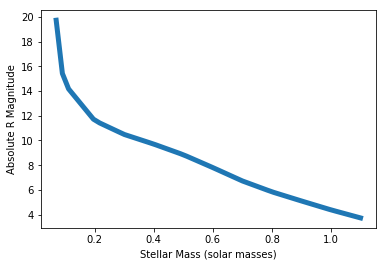

In [4]:
# create an arbitrary array of mass values
f = b.tofrom('Mr')('mass')
xmin, xmax = b.limits('mass')
masses = np.linspace(xmin, xmax)
plt.plot(masses, f(masses), linewidth=5)
plt.xlabel('Stellar Mass (solar masses)')
plt.ylabel('Absolute R Magnitude');

We can also look at that relation in the opposite direction, going from magnitude to mass.

      [baraffe] creating interpolator to convert Mr to mass


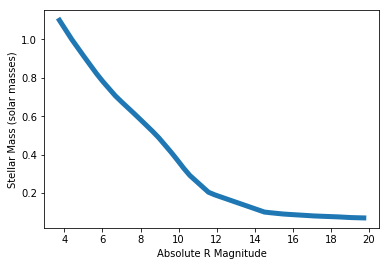

In [5]:
# create an arbitrary array of mass values
g = b.tofrom('mass')('Mr')
xmin, xmax = b.limits('Mr')
R_magnitudes = np.linspace(xmin, xmax)
plt.plot(R_magnitudes, g(R_magnitudes), linewidth=5)
plt.xlabel('Absolute R Magnitude')
plt.ylabel('Stellar Mass (solar masses)');

There are a bunch of linked columns in these sets of models. You can see all the possibilities by making a grid of plots of all possible relationship pairs. (Note, you can also prevent the `b` object from being so chatting by telling it to be a bit more pithy, has has been done here.)

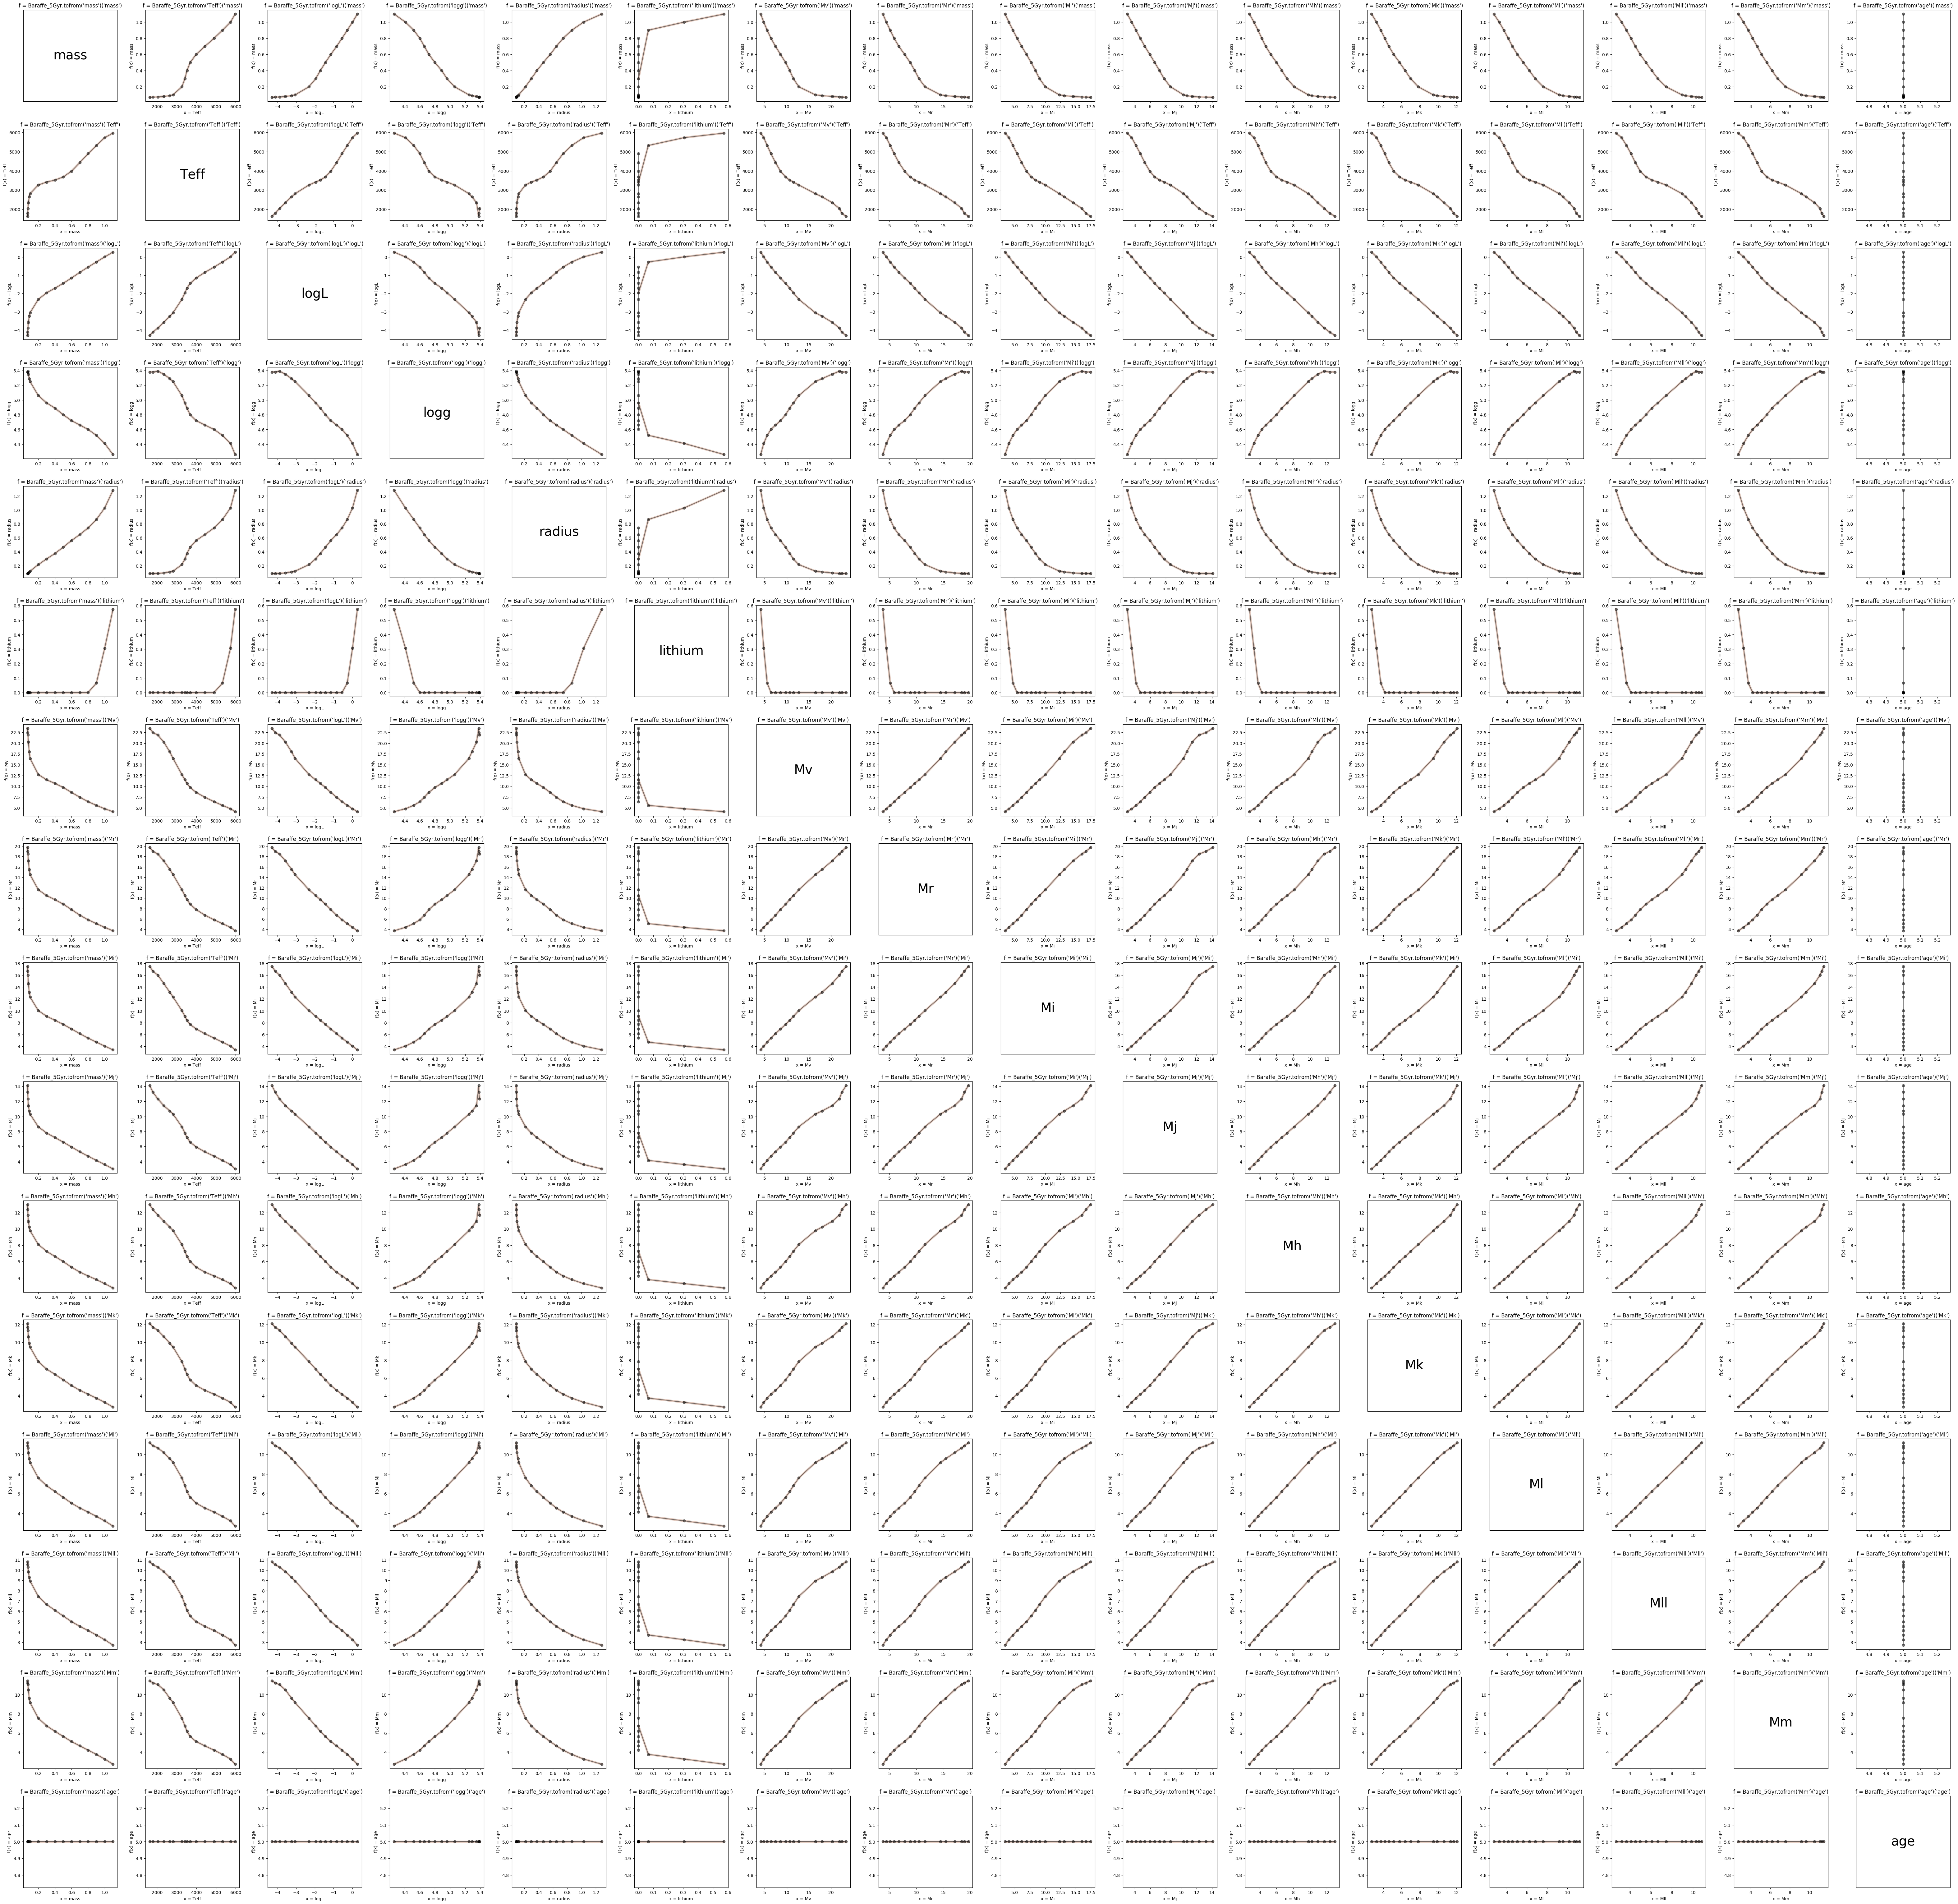

In [6]:
# make the relationship object not talk so much
b._pithy = True
# make a plot of all possible combinations
b.plot()

Of course, this is just a wrapper to a lot of very difficult astrophysics that other people did. If you use any of these relations, please be sure to cite the original sources! To help out, each relation should have a bibcode associated with it that you could feed into [NASA ADS](https://ui.adsabs.harvard.edu) to get the original reference for the relationship.

In [7]:
b.bibcode

'2015A%26A...577A..42B'

Have fun playing with these relations!